In [1]:
import json
import logging
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import interpolate

In [2]:
from config import get_config
from equation import get_equation
from solverVer2 import FeedForwardModel

In [3]:
def blackscholes_price(K, T, S, vol, r=0, q=0, callput='call'):
    F = S*np.exp((r-q)*T)
    v = np.sqrt(vol**2*T)
    d1 = np.log(F/K)/v + 0.5*v
    d2 = d1 - v
    try:
        opttype = {'call':1, 'put':-1}[callput.lower()]
    except:
        raise ValueError('The value of callput must be either "call" or "put".')
    price = opttype*(F*norm.cdf(opttype*d1)-K*norm.cdf(opttype*d2))*np.exp(-r*T)
    return price

In [4]:
def del_all_flags(FLAGS):
    flags_dict = FLAGS._flags()    
    keys_list = [keys for keys in flags_dict]    
    for keys in keys_list:
        FLAGS.__delattr__(keys)

del_all_flags(tf.flags.FLAGS)

FLAGS = tf.app.flags.FLAGS
tf.app.flags.DEFINE_string('f', '', 'kernel')

tf.app.flags.DEFINE_string('problem_name', 'EuropeanCall',
                           """The name of partial differential equation.""")
tf.app.flags.DEFINE_integer('num_run', 1,
                            """The number of experiments to repeatedly run for the same problem.""")
tf.app.flags.DEFINE_string('log_dir', './logs',
                           """Directory where to write event logs and output array.""")

In [5]:
def main():
    problem_name = FLAGS.problem_name
    config = get_config(problem_name)
    bsde = get_equation(problem_name, config.dim, config.total_time, config.num_time_interval)

    if not os.path.exists(FLAGS.log_dir):
        os.mkdir(FLAGS.log_dir)
    path_prefix = os.path.join(FLAGS.log_dir, problem_name)
    with open('{}_config.json'.format(path_prefix), 'w') as outfile:
        json.dump(dict((name, getattr(config, name))
                       for name in dir(config) if not name.startswith('__')),
                  outfile, indent=2)
    logging.basicConfig(level=logging.INFO,
                        format='%(levelname)-6s %(message)s')

    for idx_run in range(1, FLAGS.num_run+1):
        tf.reset_default_graph()
        with tf.Session() as sess:
            logging.info('Begin to solve %s with run %d' % (problem_name, idx_run))
            model = FeedForwardModel(config, bsde, sess)
            model.build()
            training_history, graphs = model.train()
            np.savetxt('{}_training_history_{}.csv'.format(path_prefix, idx_run),
                       training_history,
                       fmt=['%d', '%.5e', '%d'],
                       delimiter=",",
                       header="step,loss_function,elapsed_time",
                       comments='')
    return graphs

In [6]:
g=main()

INFO   Begin to solve EuropeanCall with run 1


WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:56: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:114: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.



WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:114: The name tf.AUTO_REUSE is deprecated. Please use tf.compat.v1.AUTO_REUSE instead.



WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:151: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:167: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:170: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:172: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


t: 5
Instructions for updating:
keep_dims is deprecated, use keepdims instead


WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:81: calling reduce_sum_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


t: 6
t: 7
t: 8



WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:101: The name tf.train.piecewise_constant is deprecated. Please use tf.compat.v1.train.piecewise_constant instead.



WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:104: The name tf.trainable_variables is deprecated. Please use tf.compat.v1.trainable_variables instead.



WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:106: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

INFO   step:     0,    loss: 2.3018e+02,  elapsed time 112
INFO   step:   100,    loss: 2.6535e+02,  elapsed time 190
INFO   step:   200,    loss: 2.4012e+02,  elapsed time 196
INFO   step:   300,    loss: 2.3184e+02,  elapsed time 202
INFO   step:   400,    loss: 2.2121e+02,  elapsed time 208
INFO   step:   500,    loss: 2.1001e+02,  elapsed time 214
INFO   step:   600,    loss: 2.0138e+02,  elapsed time 221
INFO   step:   700,    loss: 1.9570e+02,  elapsed time 227
INFO   step:   800,    loss: 1.9330e+02,  elapsed time 233
INFO   step:   900,    loss: 1.7828e+02,  elapsed time 239
INFO   step:  1000,    loss: 1.7487e+02,  elapsed time 245
INFO   step:  1100,    loss: 1.7485e+02,  elapsed time 252
INFO   step:  1200,    loss: 1.7002e+02,  elapsed time 258
INFO   step:  1300,    loss: 1.599

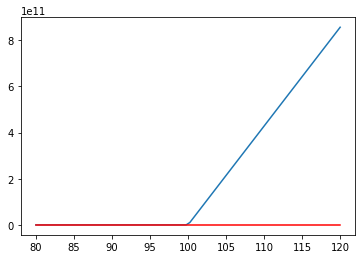

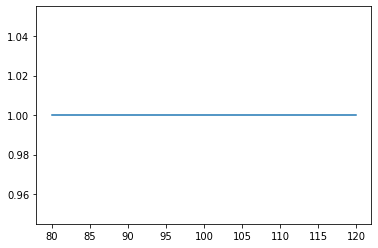

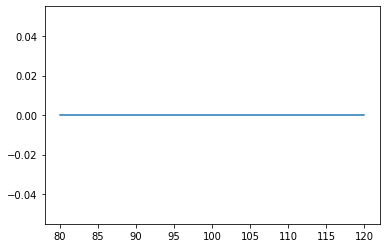

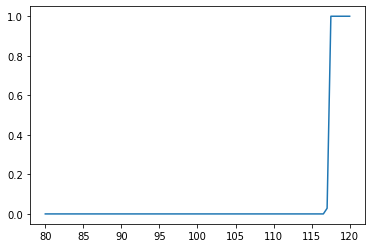

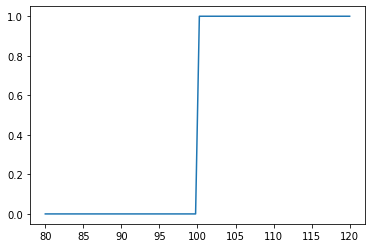

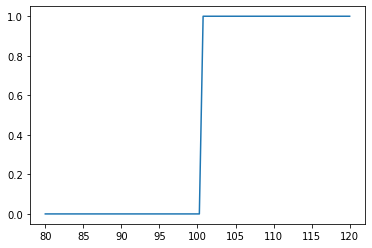

In [7]:
s0=100
k=100
r=0.02
sigma=0.20
T=1

for i in range(len(g)):
    fig, ax = plt.subplots()
    ax.plot(np.linspace(80,120, 82),np.array(g[i]).flatten())
    if i==0:
        ax.plot(np.linspace(80,120, 82),blackscholes_price(100, 0.5, np.linspace(80,120, 82), sigma, r, 0, 'call'),'r',label='Black-Scholes Price')

In [12]:
deltas=[]

for i in range(len(g)):
    deltas.append(interpolate.interp1d(np.linspace(80,120, 82),np.array(g[i]).flatten(),kind='slinear',fill_value='extrapolate'))

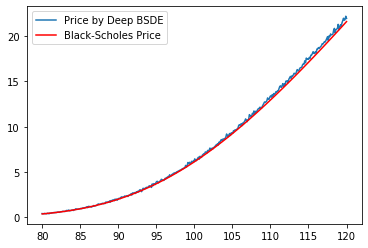

In [51]:
n_samples=10000
S=np.linspace(80,120, 402)
Yt=np.zeros(402)

for i in range(402):
    samples,dW=blackscholes_mc(S[i],sigma,r,0,np.linspace(0, 0.5, 6),n_samples)
    Y=np.maximum(samples[-1]-k,0)
    
    for j in range(4,-1,-1):
        #Y=Y+r*Y*0.1-sigma*deltas[4+j](samples[j])*dW[j+1]
        Y=Y+r*Y*0.1
    Yt[i]=np.mean(Y) 
        
fig, ax = plt.subplots()
ax.plot(S,Yt,label='Price by Deep BSDE')
ax.plot(np.linspace(80,120, 82),blackscholes_price(k, 0.5, np.linspace(80,120, 82), sigma, r, 0, 'call'),'r',label='Black-Scholes Price')
ax.legend(loc=0)

In [32]:
samples,dW=blackscholes_mc(100,sigma,r,0,np.linspace(0, 0.5, 6),2)
print(samples)
print(dW)

[[100.         100.        ]
 [ 95.12741379 105.34959018]
 [ 90.06587477  93.17892443]
 [ 97.53952658  93.68176701]
 [100.34154174  91.66134407]
 [100.81082683  99.38657406]]
[[ 0.          0.        ]
 [-0.24976498  0.26057032]
 [-0.52314421 -0.35324311]
 [-0.12456245 -0.32633302]
 [ 0.01704799 -0.43534722]
 [ 0.04037786 -0.03076576]]


In [31]:
def blackscholes_mc(S=100, vol=0.2, r=0, q=0, ts=np.linspace(0, 1, 13), npaths=10):
    """Generate Monte-Carlo paths in Black-Scholes model.

    Parameters
    ----------
    S: scalar
        The spot price of the underlying security.
    vol: scalar
        The implied Black-Scholes volatility.
    r: scalar
        The annualized risk-free interest rate, continuously compounded.
    q: scalar
        The annualized continuous dividend yield.
    ts: array_like
        The time steps of the simualtion
    npaths: int
        the number of paths to simulate

    Returns
    -------
    paths: ndarray
        The Monte-Carlo paths.
    """
    nsteps = len(ts) - 1
    ts = np.asfarray(ts)[:, np.newaxis]
    W = np.cumsum(np.vstack((np.zeros((1, npaths), dtype=np.float),
                             np.random.randn(nsteps, npaths) * np.sqrt(np.diff(ts, axis=0)))),
                  axis=0)
    paths = np.exp(-0.5*vol**2*ts + vol*W)*S*np.exp((r-q)*ts)
    return paths,W



def blackscholes_price(K, T, S, vol, r=0, q=0, callput='call'):
    """Compute the call/put option price in the Black-Scholes model
    
    Parameters
    ----------
    K: scalar or array_like
        The strike of the option.
    T: scalar or array_like
        The maturity of the option, expressed in years (e.g. 0.25 for 3-month and 2 for 2 years)
    S: scalar or array_like
        The current price of the underlying asset.
    vol: scalar or array_like
        The implied Black-Scholes volatility.
    r: scalar or array_like
        The annualized risk-free interest rate, continuously compounded.
    q: scalar or array_like
        The annualized continuous dividend yield.
    callput: str
        Must be either 'call' or 'put'.

    Returns
    -------
    price: scalar or array_like
        The price of the option.

    Examples
    --------
    >>> blackscholes_price(95, 0.25, 100, 0.2, r=0.05, callput='put')
    1.5342604771222823
    """
    F = S*np.exp((r-q)*T)
    v = np.sqrt(vol**2*T)
    d1 = np.log(F/K)/v + 0.5*v
    d2 = d1 - v
    try:
        opttype = {'call':1, 'put':-1}[callput.lower()]
    except:
        raise ValueError('The value of callput must be either "call" or "put".')
    price = opttype*(F*norm.cdf(opttype*d1)-K*norm.cdf(opttype*d2))*np.exp(-r*T)
    return price

In [8]:
s0=100
k=100
r=0.02
sigma=0.20
T=1

d1=(np.log(s0/k)+(r+sigma*sigma/2)*T)/(sigma*np.sqrt(T))
d2=(np.log(s0/k)+(r-sigma*sigma/2)*T)/(sigma*np.sqrt(T))

print(norm.cdf(d1)*s0-norm.cdf(d2)*k*np.exp(-r*T))

8.916037278572539
